## **Predicting Credit Card Fraud: Detecting Fraudulent Credit Card Transactions**

This project focuses on identifying and preventing fraudulent activities in financial transactions. Using historical credit card data, the project applies data analysis and machine learning techniques to detect unusual patterns that distinguish fraudulent transactions from genuine ones. The main goal is to develop a reliable model that can accurately predict fraud, thereby helping financial institutions reduce losses and improve transaction security.

This project uses data science to detect fraudulent credit card transactions through a structured pipeline from data preparation to real-time prediction.

1. Data Collection & Dataset Description  
2. Data Preprocessing & EDA  
3. Feature Engineering  
4. Data Normalization & Encoding  
5. Feature Selection  
6. Data Balancing  
7. Model Training & Evaluation  
8. Threshold Tuning & Evaluation  
9. Model Selection  
10. Deployment  
11. Real-Time Prediction

###**Data Collection and Dataset Description**

The dataset used in this study originates from the Fraud Detection dataset available on [Kaggle](https://www.kaggle.com/datasets/kartik2112/fraud-detection
)
. It is a simulated credit card transaction dataset containing both legitimate and fraudulent transactions that occurred between January 1, 2019, and December 31, 2020. The data represents transaction activities of 1,000 customers who interacted with about 800 merchants during the two-year period. It was synthetically generated using the Sparkov Data Generation tool developed by Brandon Harris on GitHub. Although it does not include actual financial records, the dataset was designed to mimic the structure and general behavior of real-world credit card transactions.

The dataset, named fraudTrain.csv, contains over 1.2 million rows and 23 columns. These columns include features such as trans_date_trans_time (transaction timestamp), merchant, category, amt (transaction amount), gender, city_pop (city population), and geographical coordinates (lat, long, merch_lat, merch_long). The target variable, is_fraud, identifies whether each transaction is fraudulent (1) or legitimate (0). Overall, the dataset provides a rich foundation for exploring fraud detection techniques and evaluating predictive models.

### **Data Preprocessing and EDA**

At this firs stage, the dataset was loaded and cleaned by removing irrelevant columns such as Unnamed: 0. Basic inspections using df.info() and df.head() were performed to understand the structure and data types.
Exploratory Data Analysis (EDA) was then conducted to explore relationships and trends in the data

In [ ]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Dataset from Goggle drive

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Data/fraudTrain.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. Displaying the First Five Rows**

From the first five rows, we can observe that the dataset contains details of individual credit card transactions, including attributes such as trans_date_trans_time (transaction timestamp), merchant, category, amt (transaction amount), and demographic information like gender, city_pop, lat, and long.
The target column, is_fraud, clearly identifies whether each transaction is legitimate (0) or fraudulent (1).
This initial preview confirms that the data is structured, with each row representing a single transaction record suitable for fraud detection analysis.



In [ ]:

#df.head() helps to show the first 5 records so you can visually inspect the data structure, column names, and sample values.

print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

## **2. Combine Dataset Overview, Non-Null Count, and Missing Value Summary**

The dataset overview shows that it contains **1,296,675 rows** and **23 columns**, providing a substantial amount of transaction records for analysis.  
From the non-null and missing value summary, it was observed that **all columns have complete data with no missing values**, indicating good data quality.  
This means minimal preprocessing will be required, as there are no null values to handle before proceeding with further analysis.  
Overall, the dataset appears well-structured and suitable for exploratory data analysis (EDA) and modeling.


In [ ]:
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {df.shape}")

print("\n\n=== Non-null Value Count ===")
print(df.count())

print("\n\n=== Missing Values Per Column ===")
print(df.isnull().sum())

=== Dataset Overview ===
Shape (rows, columns): (1296675, 23)


=== Non-null Value Count ===
Unnamed: 0               1296675
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64


=== Missing Values Per Column ===
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant          

## **3. Inspection and Removal of the Column, Unnamed: 0**

The column **Unnamed: 0** was examined to understand its contents before removal.  
The preview of the first ten rows showed that it only contained **index-like values** (simple row numbers) that did not add any analytical meaning to the dataset.  
Since this column does not provide useful information for identifying or predicting fraudulent transactions, it was **dropped from the dataset** to streamline further analysis and reduce redundancy.


In [ ]:
print('\nFirst 10(Ten) rows of the deleted column (Unnamed: 0):')
print(df['Unnamed: 0'].head(10))


First 10(Ten) rows of the deleted column (Unnamed: 0):
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64


In [ ]:
df2 = df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
# A second check shows the column has redused to 22 from 23
df.shape

(1296675, 22)

## **4. Dataset Information**

The dataset information summary shows that the dataframe contains **23 columns** with a mix of **object (categorical)** and **numeric (integer and float)** data types.  
All columns have **complete non-null values**, confirming there are no missing entries.  
This provides a clear understanding of the dataset’s structure and ensures that it is ready for further statistical exploration and visualization.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## **5. Summary Statistics Insight**

The summary statistics reveal that the dataset contains a wide range of numeric values across different features.  
The **transaction amount (`amt`)** has an average value of approximately $70.35, but  ranges from $1 to over $28,000, indicating high variability and the presence of both low- and high-value transactions.  
The **city population (`city_pop`)** also shows large variation, from small towns with populations around **23** to large metropolitan areas exceeding **29 million**, reflecting the dataset’s diverse geographic coverage.  
Geographical coordinates such as **latitude (`lat`, `merch_lat`)** and **longitude (`long`, `merch_long`)** have similar averages and ranges, suggesting that many transactions occur between customers and merchants in nearby regions.  
Overall, the statistics highlight that the dataset is well-suited for detecting behavioral patterns and potential anomalies in transaction values.

In [ ]:



#df.describe() gives the 5-number summary (mean, std, min, 25%, 50%, 75%, max)

df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## **6. Summary of Categorical Features**

The summary of categorical variables includes columns such as **gender**, **category**, **merchant**, and **job**, along with the **transaction date** column.  
Although the **date feature (`trans_date_trans_time`)** was listed as a categorical variable, it actually represents **temporal information** that is stored as text (`object` data type).  
Other features, such as `merchant` and `category`, contain a large number of unique values, showing the diversity of merchants and transaction types in the dataset.  
Recognizing that the date column is a time-based variable is important, as it can later be converted into a proper datetime format for trend or time-series analysis.


In [ ]:
#This section provides a summary of all categorical variables in the dataset.
#It shows how many unique categories each feature has, the most common category (top), and its frequency.
#This helps identify dominant groups, detect data imbalance, and understand the general distribution of
#non-numeric attributes before further analysis.


# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Display summary statistics for categorical columns
df[cat_cols].describe(include='all').T

,count,unique,top,freq
trans_date_trans_time,1296675,1274791,2019-04-22 16:02:01,4
merchant,1296675,693,fraud_Kilback LLC,4403
category,1296675,14,gas_transport,131659
first,1296675,352,Christopher,26669
last,1296675,481,Smith,28794
gender,1296675,2,F,709863
street,1296675,983,864 Reynolds Plains,3123
city,1296675,894,Birmingham,5617
state,1296675,51,TX,94876
job,1296675,494,Film/video editor,9779


### **7. Top 5 Merchants and Categories**

The results show the **most frequently occurring merchants and transaction categories** in the dataset.
These top merchants and categories account for a significant portion of total transactions, helping to identify **key business partners and dominant spending areas**.
This insight is useful for understanding **where fraudulent activities may be concentrated** and which sectors contribute most to transaction volume.


In [ ]:

# Top 5 merchants and categories by transaction volume

#Top 5 merchants/categories: gives an early sense of where
#most transactions happen.

print("\nTop 5 Merchants:\n", df['merchant'].value_counts().head())
print("\nTop 5 Categories:\n", df['category'].value_counts().head())


Top 5 Merchants:
 merchant
fraud_Kilback LLC    4403
fraud_Cormier LLC    3649
fraud_Schumm PLC     3634
fraud_Kuhn LLC       3510
fraud_Boyer PLC      3493
Name: count, dtype: int64

Top 5 Categories:
 category
gas_transport    131659
grocery_pos      123638
home             123115
shopping_pos     116672
kids_pets        113035
Name: count, dtype: int64


## **8. Count of Unique Values in Fraudulent vs. Non-Fraudulent Transactions**

The results show that the dataset is **highly imbalanced**, with a significantly larger number of **non-fraudulent transactions** compared to **fraudulent ones**.  
Fraudulent transactions make up only a **small percentage** of the total (typically less than 1%), while legitimate transactions account for the remaining majority.  
This imbalance highlights the importance of applying appropriate sampling or model evaluation techniques, as standard models may otherwise become biased toward predicting the majority (non-fraud) class.


In [ ]:

#df["is_fraud"] selects the column named is_fraud from your DataFrame.

#.value_counts() counts how many times each unique value appears in that column.


print("Unique value count of fraudulent and non-fraudulent transactions:")
print(df["is_fraud"].value_counts())

fraud_percent = df['is_fraud'].mean() * 100
non_fraud_percent = 100 - fraud_percent

print(f"\nFraud Percentage: {fraud_percent:.2f}%")
print(f"\nNon-Fraud Percentage: {non_fraud_percent:.2f}%")

### **9. Fraud vs Non-Fraud Transaction Count Visualization**

The visualization shows a significant imbalance between fraudulent and non-fraudulent transactions. Non-fraudulent cases (0) dominate the dataset, while fraudulent ones (1) make up only a small portion, indicating class imbalance that should be addressed during model training.


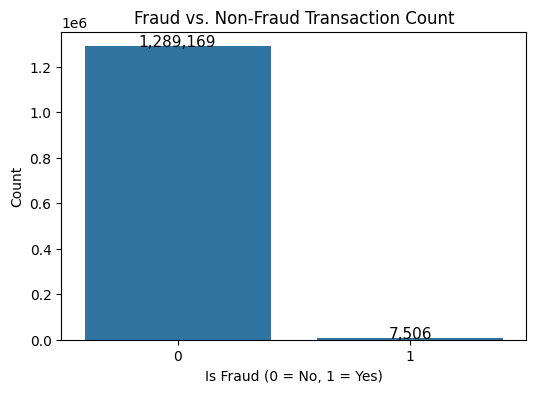

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x='is_fraud', data=df)

# Add title and labels
plt.title('Fraud vs. Non-Fraud Transaction Count')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add value labels on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,        # X-position (center of bar)
            p.get_height() + 500,               # Y-position (slightly above bar)
            f'{int(p.get_height()):,}',         # Display count with commas
            ha='center', fontsize=11, color='black')

plt.show()

### **10. Correlation Matrix**

The correlation heatmap displays the relationships between numerical features in the dataset. Stronger correlations are highlighted in deeper colors, helping identify features that move together or have inverse relationships. This insight is useful for detecting multicollinearity and understanding which variables may influence fraudulent transactions.


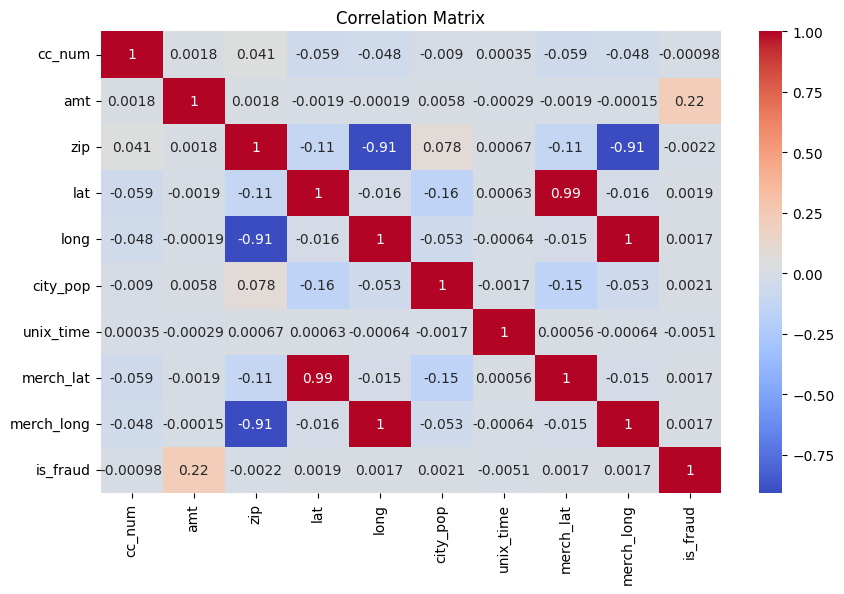

In [ ]:
#Correlation Heatmap (numerical features only)

# This code creates a heatmap to visualize the correlation between numerical features
# in the dataset. It helps identify relationships or patterns between variables,
# such as which features are positively or negatively correlated with each other.


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### **11. Histogram of Numeric Features**

The histograms display the distribution of all numerical variables in the dataset.
Most features appear **skewed rather than normally distributed**, indicating that values are concentrated within specific ranges.
This helps identify potential **outliers, data imbalance, or scaling issues** that may need to be addressed before modeling.


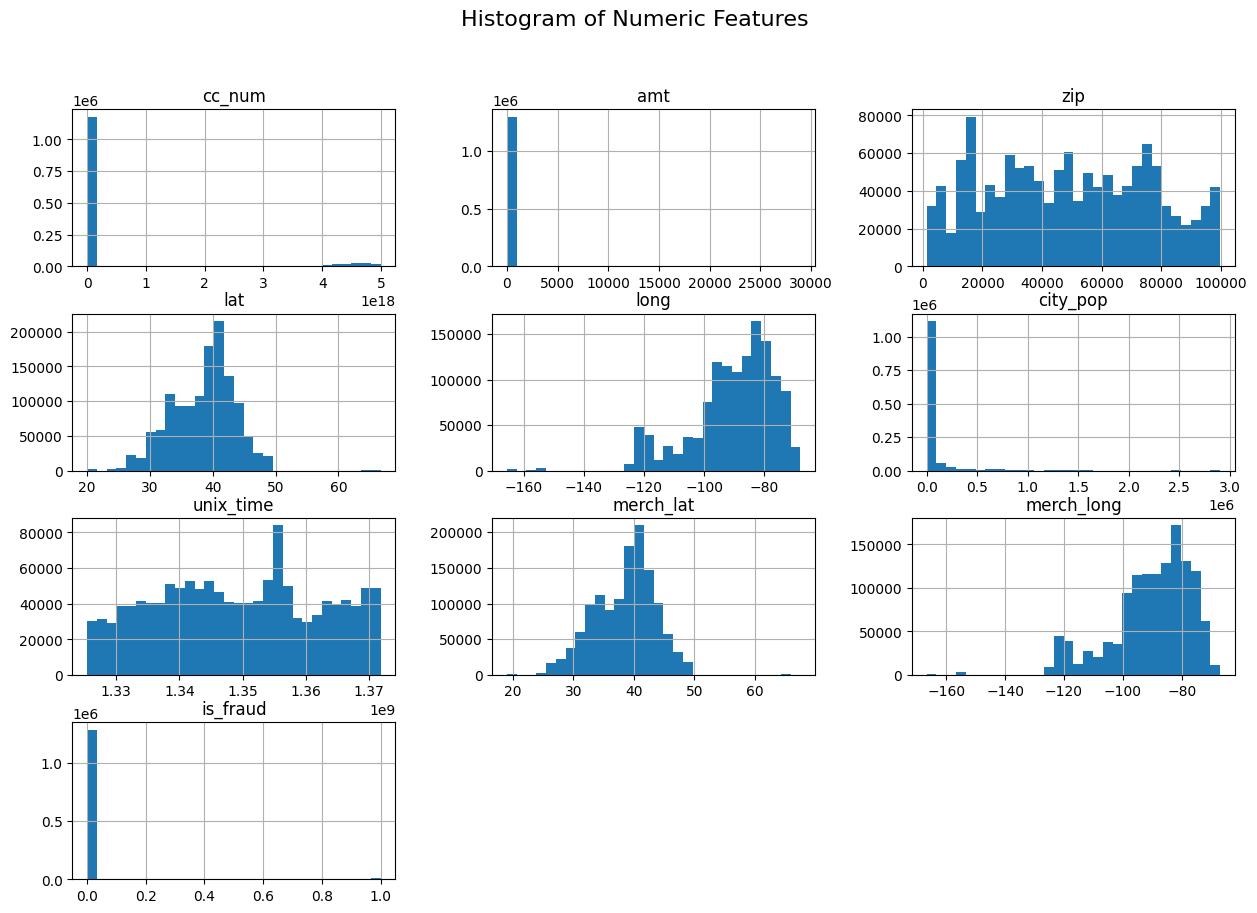

In [ ]:
#Histogram plot for all numeric colimumns

# Plot histograms for all numeric columns

# This code creates histograms for all numeric columns in the dataset.
# Histograms help visualize the distribution of numerical features such as
# transaction amount, city population, and geographic coordinates.
# By observing the shape of each distribution, we can identify patterns like
# skewness, outliers, and value concentration.
# The figsize parameter controls the overall size of the plot, while bins=30
# divides the data into 30 intervals for smoother visualization.
# The suptitle() function adds a main title to the entire figure for clarity.

df.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histogram of Numeric Features', fontsize=16)
plt.show()

### **12. Fraud Rate by Transaction Category**

The visualization illustrates the percentage of fraudulent transactions across different transaction categories. From the chart, it was observed that fraud occurs more frequently in shopping_net, misc_net, shopping_pos, and gas_transport, indicating that online and everyday retail transactions are more vulnerable to fraudulent activity. In contrast, categories such as home and health_fitness show a much lower fraud rate, suggesting that these areas experience fewer fraudulent attempts.

This pattern highlights that fraudsters tend to target online and high-frequency purchase categories, possibly due to the higher transaction volume and lower verification barriers typically associated with such transactions.

/tmp/ipython-input-2391174642.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




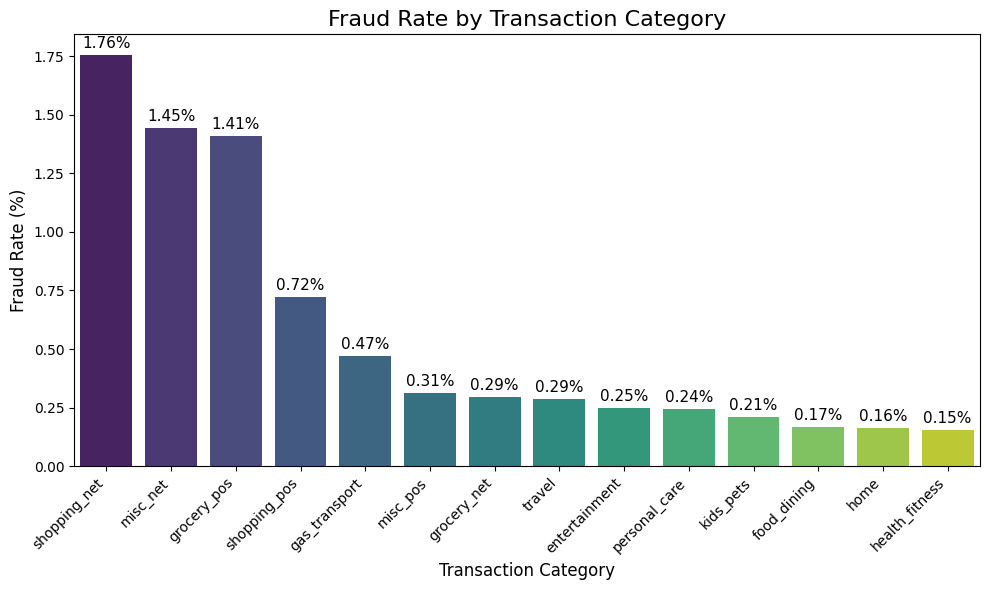

In [ ]:

# Fraud Rate by Transaction Category
plt.figure(figsize=(10, 6))

# Calculate fraud rate per category
fraud_rate_by_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False) * 100

# Create the bar plot
ax = sns.barplot(x=fraud_rate_by_category.index, y=fraud_rate_by_category.values, palette='viridis')

# Add titles and labels
plt.title('Fraud Rate by Transaction Category', fontsize=16)
plt.xlabel('Transaction Category', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 0.03,
            f'{p.get_height():.2f}%', ha='center', fontsize=11, color='black')

plt.tight_layout()
plt.show()

### **13. Transaction Amount Distribution: Fraud vs Non-Fraud**

The boxplot compares the distribution of transaction amounts between fraudulent and non-fraudulent transactions. It shows that fraudulent transactions generally involve higher amounts compared to non-fraudulent ones. Using a logarithmic scale reveals that while most non-fraudulent transactions are of smaller value, fraud cases tend to cluster around larger transaction amounts, suggesting that fraudsters often target high-value transactions to maximize gain.

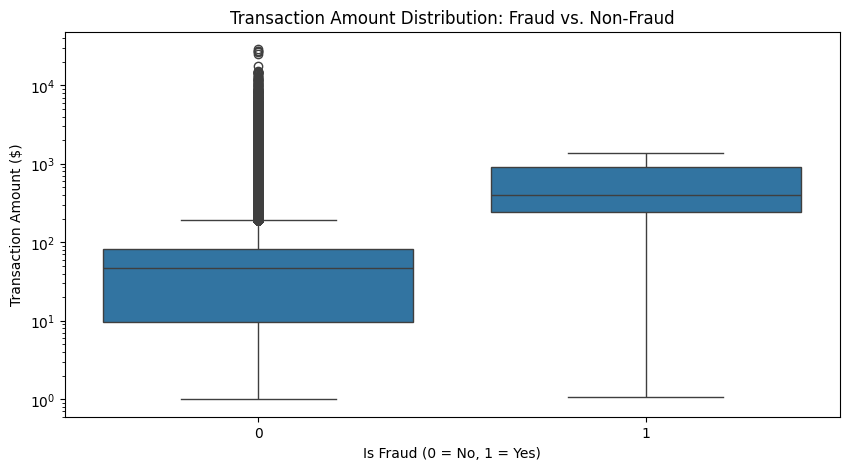

In [ ]:
#Transaction Amount vs. Fraud

# This boxplot compares transaction amounts between fraudulent (1) and non-fraudulent (0) transactions.
# The log scale on the y-axis helps visualize differences across a wide range of transaction values
# and identify any unusual or extreme amounts linked to fraud.


plt.figure(figsize=(10,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount Distribution: Fraud vs. Non-Fraud')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount ($)')
plt.yscale('log')  # log scale helps visualize wide ranges
plt.show()

### **14. City Population vs Fraud Distribution**

The histogram illustrates how fraud and non-fraud transactions are distributed across different city population sizes. It shows that fraudulent transactions occur more frequently in areas with larger city populations, suggesting that urban regions may have a higher risk of fraudulent activity. In contrast, smaller cities and towns record fewer fraud cases, likely due to lower transaction volumes and customer density.

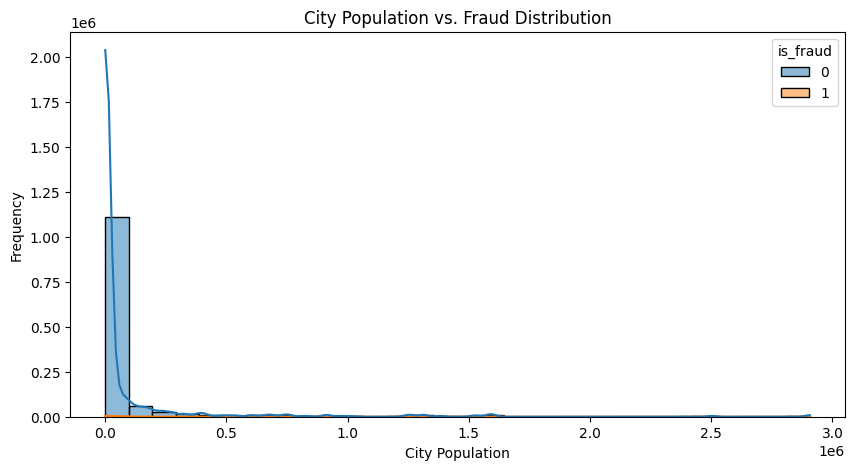

In [ ]:
#City Population vs. Fraud
# This code plots a histogram showing the distribution of city populations
# for both fraudulent and non-fraudulent transactions. It helps visualize
# whether fraud occurs more frequently in highly populated or less populated areas.


plt.figure(figsize=(10,5))
sns.histplot(data=df, x='city_pop', hue='is_fraud', bins=30, kde=True)
plt.title('City Population vs. Fraud Distribution')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()

### **15. Fraud Count by Gender**

The count plot shows that female customers have more total transactions overall, indicating higher activity levels. However, male customers account for more fraudulent transactions, suggesting that while females transact more frequently, fraud incidents are relatively more common among males.

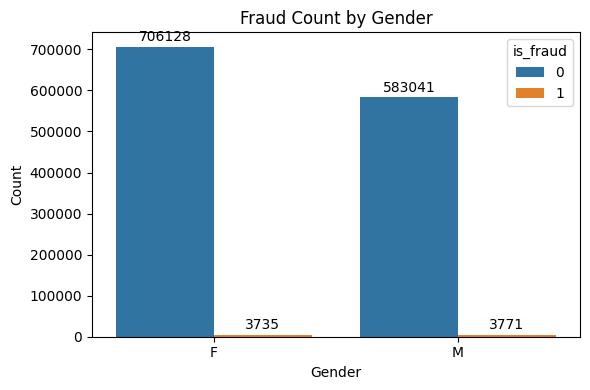

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', hue='is_fraud', data=df)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.title('Fraud Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### **16. Daily Fraudulent Transactions Over Time**

The time series visualization shows how the number of fraudulent transactions fluctuated over time. From the plot, it can be observed that fraud cases occur irregularly, with certain periods showing noticeable spikes in fraudulent activity. These peaks may indicate specific time frames when fraudulent attempts increased, possibly due to seasonal patterns, targeted attacks, or system vulnerabilities. Overall, the trend highlights the importance of continuous fraud monitoring over time.

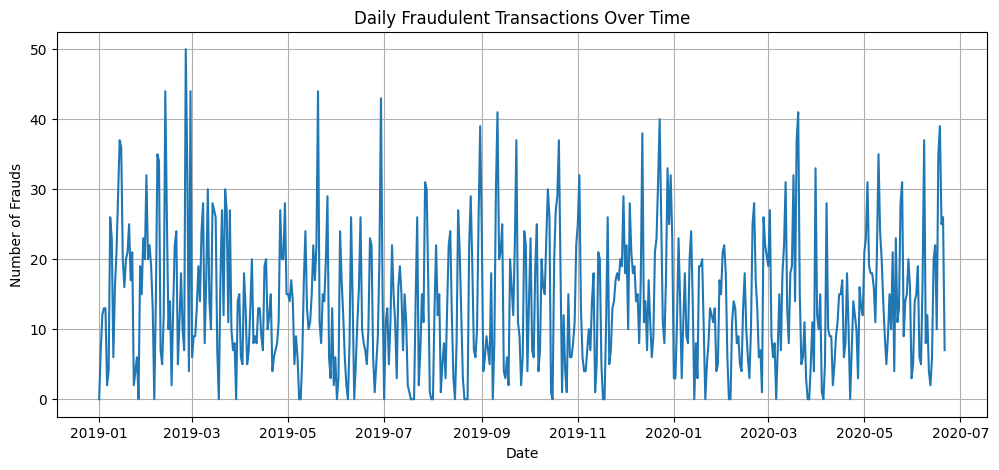

In [ ]:

#Transactions Over Time
#Explanation:
#Identifies temporal patterns, such as spikes in fraud on certain days or seasons.

# Convert transaction date column to datetime if not already
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Transactions per day
daily_fraud = df.groupby(df['trans_date_trans_time'].dt.date)['is_fraud'].sum()

plt.figure(figsize=(12,5))
daily_fraud.plot()
plt.title('Daily Fraudulent Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Frauds')
plt.grid(True)
plt.show()

### **17. Top 10 Cities by Fraud Percentage (Cities with Over 100 Transactions)**

Insight:
Among cities with more than 100 transactions, Aurora recorded the highest fraud rate at 4.49%, followed by Clearwater (4.34%), Benton (3.21%), and Moscow (3.10%). Other notable cities such as Boulder, Howes Cave, and Riverview also showed moderately high fraud activity. This suggests that even in cities with larger transaction volumes, fraud concentration can vary significant

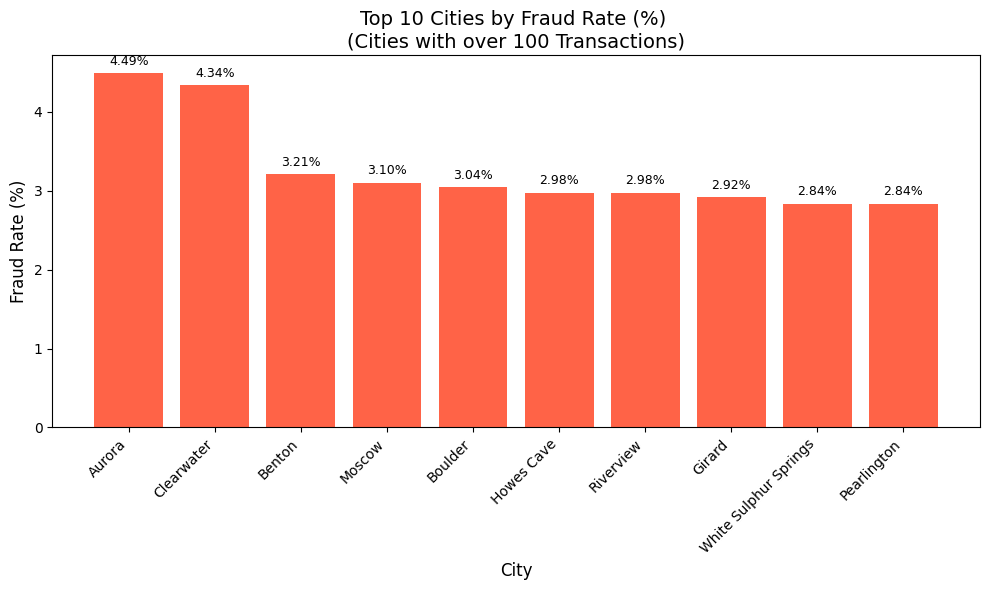

,fraud_rate,transaction_count
city,,
Aurora,4.492188,512
Clearwater,4.339964,553
Benton,3.207547,530
Moscow,3.100775,516
Boulder,3.042596,493
Howes Cave,2.976190,504
Riverview,2.976190,504
Girard,2.918288,514
White Sulphur Springs,2.835539,529


In [ ]:
# Calculate fraud rate per city (as a percentage)
fraud_city_rate = (
    df.groupby('city')['is_fraud']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'fraud_rate', 'count': 'transaction_count'})
)

# Filter only cities with more than 100 total transactions
fraud_city_rate = fraud_city_rate[fraud_city_rate['transaction_count'] > 100]

# Convert to percentage and get top 10
fraud_city_rate['fraud_rate'] = fraud_city_rate['fraud_rate'] * 100
top10_cities_filtered = fraud_city_rate.sort_values(by='fraud_rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top10_cities_filtered.index, top10_cities_filtered['fraud_rate'], color='tomato')
plt.title('Top 10 Cities by Fraud Rate (%) \n(Cities with over 100 Transactions)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval + 0.07,
        f'{yval:.2f}%', ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the table for clarity
top10_cities_filtered

### **18. Top 10 States by Fraud Rate (%)**

The analysis of fraud rates across states revealed that **Delaware (DE)** had an exceptionally high **100% fraud rate**, meaning every transaction recorded in the dataset from DE was fraudulent. This likely indicates a **very small number of total transactions** in that state, causing the rate to appear extreme.
Other states such as **Rhode Island (RI)** at **2.7%**, **Alaska (AK)** at **1.7%**, and **Nevada (NV)** at **0.8%** also showed relatively higher fraud rates compared to the rest.
Overall, this insight highlights how **fraud distribution varies geographically**, with some states exhibiting significantly higher proportions of fraudulent activity — potentially due to **low transaction volumes or regional fraud patterns**.


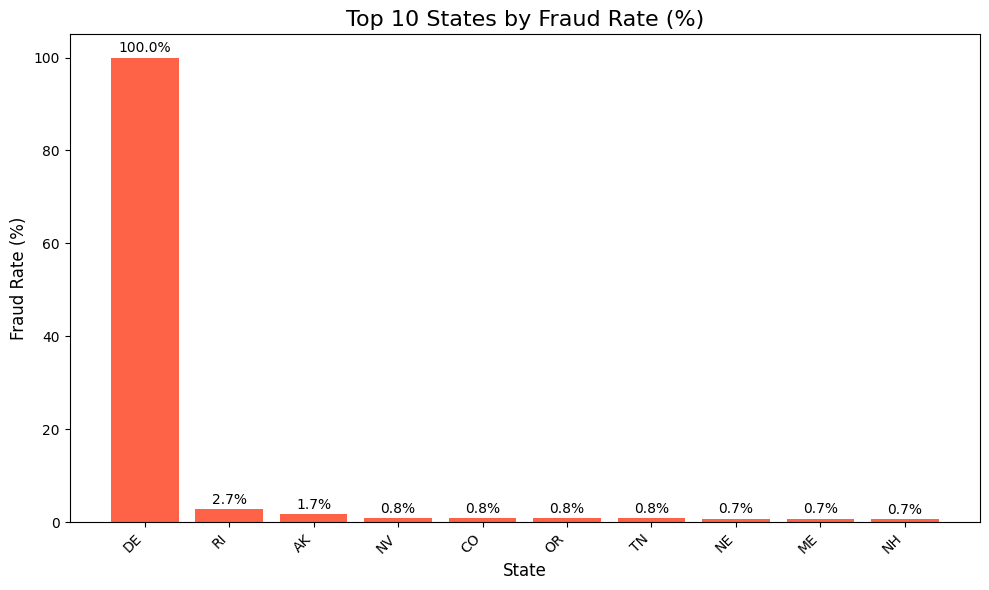

In [ ]:

fraud_rate = (
    df.groupby('state')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    * 100
)

plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_rate.index, fraud_rate.values, color='tomato')
plt.title('Top 10 States by Fraud Rate (%)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.5,
        f'{yval:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **19. Geographical Distribution of Fraudulent Transactions**

**Insight:**
The map highlights only the **locations where fraudulent transactions occurred**, revealing visible fraud concentration zones across the U.S. The clustering of red points suggests that certain regions or cities experience **higher fraud density**, which may be linked to local merchant activity or regional transaction volume patterns.

In [ ]:
# --- MAP VISUALIZATION: GEOGRAPHICAL DISTRIBUTION OF FRAUDULENT TRANSACTIONS ---
import plotly.express as px

# Filter only fraudulent transactions
df_fraud = df[df['is_fraud'] == 1]

# Create scatter map for fraudulent transactions
fig = px.scatter_mapbox(
    df_fraud,
    lat="lat",
    lon="long",
    hover_name="merchant",
    hover_data=["category", "amt", "city", "state"],
    color_discrete_sequence=["red"],  # all frauds in red
    title="Geographical Distribution of Fraudulent Transactions",
    zoom=3,
    height=600
)

# Use OpenStreetMap style
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker=dict(size=5, opacity=0.6))
fig.show()

## **Feature Engineering**

Feature engineering involves creating new variables from existing data to reveal deeper insights and improve fraud detection accuracy. In this project, features like year, month, and time_of_day were extracted from transaction date, while is_low_amount, is_high_amount, and log_amt came from transaction amount. The geographical coordinates produced distance_km, and customer patterns from cc_num generated features such as cust_total_transactions and cust_fraud_rate.

### **1. Date and Time Feature Extraction**

After extracting detailed temporal components from the trans_date_trans_time column, new features such as year, month, day, day_of_week, hour, is_weekend, and time_of_day were created.

These new time-based variables will help uncover when fraudulent transactions are most likely to occur — for example, identifying if fraud spikes during specific hours, days of the week, or weekends. This adds valuable temporal context for deeper fraud trend analysis and model training.

In [ ]:
# --- DATE AND TIME FEATURE ENGINEERING ---
# Convert to datetime if not already
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract date and time components
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['hour'] = df['trans_date_trans_time'].dt.hour

# Create a weekend flag (1 for weekend, 0 for weekday)
df['is_weekend'] = (df['trans_date_trans_time'].dt.dayofweek >= 5).astype(int)

# Optional: categorize hour into parts of the day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(get_time_of_day)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year,month,day,day_of_week,hour,is_weekend,time_of_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019,1,1,Tuesday,0,0,Night
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019,1,1,Tuesday,0,0,Night
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019,1,1,Tuesday,0,0,Night
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019,1,1,Tuesday,0,0,Night
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019,1,1,Tuesday,0,0,Night


### **---Dropping trans_date_trans_time**
The trans_date_trans_time column was dropped after extracting its components (year, month, day, hour, etc.) to avoid redundancy. Only numeric features were kept to ensure compatibility with machine learning models.

In [ ]:
df = df.drop(columns=['trans_date_trans_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  object 
 2   category     1296675 non-null  object 
 3   amt          1296675 non-null  float64
 4   first        1296675 non-null  object 
 5   last         1296675 non-null  object 
 6   gender       1296675 non-null  object 
 7   street       1296675 non-null  object 
 8   city         1296675 non-null  object 
 9   state        1296675 non-null  object 
 10  zip          1296675 non-null  int64  
 11  lat          1296675 non-null  float64
 12  long         1296675 non-null  float64
 13  city_pop     1296675 non-null  int64  
 14  job          1296675 non-null  object 
 15  dob          1296675 non-null  object 
 16  trans_num    1296675 non-null  object 
 17  unix_time    1296675 non-null  int64  
 18  me

### **2. Transaction Amount Features: Log Transform and Extreme Flags**

A log-transformed amount (`log_amt`) was created to reduce skewness in the `amt` distribution and stabilize variance for modeling.  
Additionally, transactions below the **5th percentile** and above the **95th percentile** were flagged as `is_low_amount` and `is_high_amount`, respectively.  
These extreme-value flags help highlight unusually small or large transactions that may warrant further investigation for potential fraud.

In [ ]:
# Transaction amount features: log transform and extreme-value flags
import numpy as np


# 1) Create a safe log-transformed amount (handles zeros)
df['log_amt'] = np.log1p(df['amt'])   # log1p = log(1 + amt)


# 2) Define extreme thresholds (5th and 95th percentiles)
low_threshold = df['amt'].quantile(0.05)
high_threshold = df['amt'].quantile(0.95)


# 3) Create binary flags for very low and very high amounts
df['is_low_amount'] = (df['amt'] < low_threshold).astype(int)
df['is_high_amount'] = (df['amt'] > high_threshold).astype(int)


# 4) Quick preview of the new columns
df[['amt', 'log_amt', 'is_low_amount', 'is_high_amount']].head(10)

,amt,log_amt,is_low_amount,is_high_amount
0,4.97,1.786747,0,0
1,107.23,4.684259,0,0
2,220.11,5.398660,0,1
3,45.00,3.828641,0,0
4,41.96,3.760269,0,0
5,94.63,4.560487,0,0
6,44.54,3.818591,0,0
7,71.65,4.285653,0,0
8,4.27,1.662030,0,0
9,198.39,5.295263,0,1


### **3. Customer Age Feature and Age Group**

Customer age was extracted using a fixed benchmark date of December 31, 2020 to ensure consistency across all records. This prevents variations in age for customers with multiple transactions in different years.
The age variable helps in understanding demographic patterns, identifying high-risk age segments, and improving fraud detection models or customer segmentation analysis. Customers were then categorized into groups — Underage, Young Adult, Middle Aged, and Senior — for clearer pattern interpretation.

In [ ]:

# --- DOB FEATURE ENGINEERING WITH BENCHMARK DATE ---

import pandas as pd

# Convert to datetime if not already
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Define benchmark date (last date data was collected)
benchmark_date = pd.to_datetime('2020-12-31')

# Calculate age as of benchmark date
df['age'] = benchmark_date.year - df['dob'].dt.year

# Adjust if birthday hasn't occurred yet in 2020
mask = (
    (benchmark_date.month < df['dob'].dt.month)
    | (
        (benchmark_date.month == df['dob'].dt.month)
        & (benchmark_date.day < df['dob'].dt.day)
    )
)
df.loc[mask, 'age'] -= 1

# Categorize into age groups
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 18:
        return 'Underage'
    elif 18 <= age < 30:
        return 'Young Adult'
    elif 30 <= age < 50:
        return 'Middle Aged'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

# Preview results
df[['dob', 'age', 'age_group']].head()

,dob,age,age_group
0,1988-03-09,32,Middle Aged
1,1978-06-21,42,Middle Aged
2,1962-01-19,58,Senior
3,1967-01-12,53,Senior
4,1986-03-28,34,Middle Aged


###**---Drop Date of Birth (DOB) Feature**

After extracting the **Age** feature from the DOB, the original DOB column was dropped to avoid redundancy and reduce data dimensionality, keeping only the relevant information for modeling.

In [ ]:
# DropDate Of Birth (DOB) feature
df = df.drop(columns=['dob'])

### **4. Geographical Distance Feature Engineering**

Using the Haversine formula, a new feature called distance_km was created to measure the distance (in kilometers) between a customer's location and the merchant’s location.

Insight:
This feature helps capture spatial behavior in transactions. Larger distances may indicate a higher likelihood of fraud, as legitimate transactions typically occur closer to a customer’s usual location. The summary statistics of distance_km provide insights into how far most transactions occur, which can be useful for detecting unusual or suspicious patterns.

In [ ]:
# --- FEATURE ENGINEERING: GEOGRAPHICAL DISTANCE ---
import numpy as np

# Define a function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth specified in decimal degrees.
    Returns distance in kilometers.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply the function to create a new column 'distance_km'
df['distance_km'] = haversine_distance(
    df['lat'], df['long'], df['merch_lat'], df['merch_long']
)

# Display summary statistics of the new feature
print("=== Summary of New Feature: distance_km ===")
print(df['distance_km'].describe())

=== Summary of New Feature: distance_km ===
count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: distance_km, dtype: float64


### **5. Customer Behavior Pattern Feature Engineering**

Several new features were created to capture individual customer spending and transaction patterns. These include the total number of transactions, average and standard deviation of transaction amounts, total fraud transactions, and each customer’s fraud rate.

These features reveal behavioral tendencies, such as how often a customer transacts, their usual spending range, and how frequently they are linked to fraud. Customers with unusually high spending variation or frequent fraudulent activity can now be easily identified, helping to uncover suspicious transaction behaviors for further analysis or modeling.

In [ ]:

# --- FEATURE ENGINEERING: CUSTOMER BEHAVIOR PATTERNS ---

# 1. Total number of transactions per customer
df['cust_total_transactions'] = df.groupby('cc_num')['cc_num'].transform('count')

# 2. Average transaction amount per customer
df['cust_avg_amt'] = df.groupby('cc_num')['amt'].transform('mean')

# 3. Standard deviation of transaction amount per customer (measures spending variation)
df['cust_std_amt'] = df.groupby('cc_num')['amt'].transform('std').fillna(0)

# 4. Total number of fraud transactions per customer
df['cust_total_fraud'] = df.groupby('cc_num')['is_fraud'].transform('sum')

# 5. Customer fraud rate (ratio of fraud to total transactions)
df['cust_fraud_rate'] = df['cust_total_fraud'] / df['cust_total_transactions']

# Show a few samples to verify
print("=== Customer Behavior Features (sample) ===")
print(df[['cc_num', 'cust_total_transactions', 'cust_avg_amt', 'cust_std_amt', 'cust_total_fraud', 'cust_fraud_rate']].head())

=== Customer Behavior Features (sample) ===
             cc_num  cust_total_transactions  cust_avg_amt  cust_std_amt  \
0  2703186189652095                     2028     87.393215    126.596221   
1      630423337322                     3030     53.949320    118.337621   
2    38859492057661                      503     65.870040    101.585754   
3  3534093764340240                      493     72.776673    148.593473   
4   375534208663984                     2017     95.178091     89.133972   

   cust_total_fraud  cust_fraud_rate  
0                 0         0.000000  
1                 0         0.000000  
2                 0         0.000000  
3                15         0.030426  
4                 0         0.000000  


## **Data Normalization and Encoding**

To prepare the dataset for machine learning, all numerical and categorical features were transformed into a suitable format. Numerical variables were **standardized** using `StandardScaler`, ensuring each feature contributes equally to the model. Categorical variables such as **gender**, **state**, **category**, and **day_of_week** were **encoded** using a mix of label encoding and one-hot encoding.

**Insight:**
After normalization and encoding, the dataset became fully numeric and standardized, making it ready for model training. This transformation helps prevent bias from large-valued features and ensures that the model interprets categorical information correctly during prediction.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define target column name
target_col = 'is_fraud'  # <-- replace with your actual target column name

# Convert boolean-like strings to integers (0/1)
for col in df.columns:
    if df[col].dtype == 'object' and col != target_col:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

# Encode remaining object columns except target
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != target_col:
        df[col] = le.fit_transform(df[col].astype(str))

# Ensure target is binary (0 and 1)
df[target_col] = df[target_col].astype(int)

print("✅ All categorical and object columns encoded successfully (target untouched)!")
print("Remaining non-numeric columns:", df.select_dtypes(exclude=['number']).columns.tolist())
print(df[target_col].value_counts())

✅ All categorical and object columns encoded successfully (target untouched)!
Remaining non-numeric columns: []
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


##**Feature Selection**

###**1. Split the Dataset before any Feature Selection**

At this stage, the dataset is cleanly separated into training and testing sets before any feature selection, scaling, or SMOTE is applied.
This is a critical step to avoid data leakage — ensuring the model never “sees” information from the test set during feature selection or balancing.

The stratify=y parameter ensures that the fraud vs non-fraud proportions remain the same in both splits, which is important because fraud datasets are highly imbalanced.

By doing this, you ensure that everything learned (feature importance, SMOTE, model performance) is based only on training data, leading to more realistic, trustworthy model evaluation

In [ ]:
# --- STEP 1: Split the dataset before any feature selection ---
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud'].astype(int)

# Split data (stratify to preserve fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("✅ Data successfully split into train/test")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

✅ Data successfully split into train/test
Train shape: (907672, 37)
Test shape: (389003, 37)


### **2: Feature Selection Performed only on Training Data**

**Insight:**
Using two different feature-selection methods (ANOVA F-test and Random Forest importance) gives a clearer understanding of which variables contribute most to fraud detection.

* **ANOVA F-test** highlights features with strong *statistical correlation* to the target.
* **Random Forest importance** identifies features that improve *predictive power* in a tree-based model.

Comparing the top 10 features from both methods helps confirm consistently strong predictors and ensures your final model is built on the most informative variables.

---

In [ ]:
# --- STEP 2: Feature selection performed only on training data ---
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 1️⃣ ANOVA F-test (Top 10 features)
select_k = SelectKBest(score_func=f_classif, k=10)
select_k.fit(X_train, y_train)

anova_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': select_k.scores_
}).sort_values(by='F_Score', ascending=False)

print("=== Top 10 Features (ANOVA F-test) ===")
anova_top = anova_scores.head(10)
display(anova_top)

# 2️⃣ Random Forest feature importance
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n=== Top 10 Features (Random Forest Importance) ===")
rf_top = importances.head(10)
display(rf_top)

=== Top 10 Features (ANOVA F-test) ===


,Feature,F_Score
36,cust_fraud_rate,103078.525917
28,is_high_amount,59430.435215
3,amt,49145.904577
33,cust_avg_amt,41127.982476
26,log_amt,13221.671397
25,time_of_day,4702.359083
32,cust_total_transactions,2715.080456
35,cust_total_fraud,2232.887971
34,cust_std_amt,671.232703
2,category,382.292441



=== Top 10 Features (Random Forest Importance) ===


,Feature,Importance
26,log_amt,0.158993
3,amt,0.153353
2,category,0.117682
23,hour,0.070974
36,cust_fraud_rate,0.052025
33,cust_avg_amt,0.050563
32,cust_total_transactions,0.043838
25,time_of_day,0.034502
29,age,0.024046
35,cust_total_fraud,0.021262


### **3. Combine ANOVA and RF Results**


This step compares the top features selected by both ANOVA F-test and Random Forest importance.  
- **Common features** represent the strongest and most reliable predictors because *both statistical and model-based methods* agree on them.  
- The **combined feature set** expands the pool of candidate inputs, ensuring no potentially useful feature is missed.

This helps create a balanced feature subset that is both statistically relevant and practically effective for model training.


In [ ]:
# --- STEP 3: Combine ANOVA and RF results ---
anova_features = anova_top['Feature'].tolist()
rf_features = rf_top['Feature'].tolist()

common_features = list(set(anova_features).intersection(rf_features))
combined_features = list(set(anova_features).union(rf_features))

print("=== ✅ Common Top Features (Likely Strongest) ===")
print(common_features)
print("\n=== 🔍 Combined Feature Set (Candidate Inputs) ===")
print(combined_features)

=== ✅ Common Top Features (Likely Strongest) ===
['cust_total_fraud', 'log_amt', 'cust_total_transactions', 'cust_avg_amt', 'category', 'amt', 'cust_fraud_rate', 'time_of_day']

=== 🔍 Combined Feature Set (Candidate Inputs) ===
['cust_total_fraud', 'log_amt', 'is_high_amount', 'cust_total_transactions', 'hour', 'cust_avg_amt', 'category', 'age', 'cust_std_amt', 'amt', 'cust_fraud_rate', 'time_of_day']


### **4. Forward Feature Selection (Using Common + Combined Feature Sets)**

This step applies **forward feature selection** with Logistic Regression to identify the optimal subset of predictors.  
Two separate searches are performed:

- **Common feature set:** Only the features agreed upon by both ANOVA and Random Forest.  
- **Combined feature set:** A broader collection that includes all features identified by either method.

Each selected subset is evaluated using **5-fold CV** and tested with ROC-AUC on the hold-out test set.  
Whichever set achieves a **higher ROC-AUC** is considered the better feature configuration.  
This ensures the final model is both **accurate and compact**, keeping only features that truly improve predictive power.

In [ ]:
# --- STEP 4: Forward Feature Selection using only training data ---
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score

# Prepare data subsets
X_train_c = X_train[common_features]
X_test_c  = X_test[common_features]
X_train_cb = X_train[combined_features]
X_test_cb  = X_test[combined_features]

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Forward selection (Common features)
sfs_common = SequentialFeatureSelector(
    log_reg, n_features_to_select='auto', direction='forward',
    scoring='roc_auc', cv=5
)
sfs_common.fit(X_train_c, y_train)
selected_common = X_train_c.columns[sfs_common.get_support()].tolist()

# Forward selection (Combined features)
sfs_combined = SequentialFeatureSelector(
    log_reg, n_features_to_select='auto', direction='forward',
    scoring='roc_auc', cv=5
)
sfs_combined.fit(X_train_cb, y_train)
selected_combined = X_train_cb.columns[sfs_combined.get_support()].tolist()

# Evaluate both sets on the hold-out test data
log_reg.fit(X_train_c[selected_common], y_train)
auc_common = roc_auc_score(y_test, log_reg.predict_proba(X_test_c[selected_common])[:, 1])

log_reg.fit(X_train_cb[selected_combined], y_train)
auc_combined = roc_auc_score(y_test, log_reg.predict_proba(X_test_cb[selected_combined])[:, 1])

print("=== ✅ Forward Selection Results ===")
print(f"Selected Features (Common Set): {selected_common}")
print(f"ROC-AUC (Common Set): {auc_common:.4f}\n")
print(f"Selected Features (Combined Set): {selected_combined}")
print(f"ROC-AUC (Combined Set): {auc_combined:.4f}")

if auc_combined > auc_common:
    print("\n🚀 The Combined feature set performed better in forward selection.")
else:
    print("\n🎯 The Common feature set performed better or equally well.")

=== ✅ Forward Selection Results ===
Selected Features (Common Set): ['cust_total_fraud', 'log_amt', 'cust_total_transactions', 'time_of_day']
ROC-AUC (Common Set): 0.9110

Selected Features (Combined Set): ['cust_total_fraud', 'is_high_amount', 'cust_total_transactions', 'category', 'cust_fraud_rate', 'time_of_day']
ROC-AUC (Combined Set): 0.9541

🚀 The Combined feature set performed better in forward selection.



##**Data Balancing**

### **1. Check class distribution**

The dataset is highly imbalanced, with **99.42% non-fraud cases** and only **0.58% fraud cases**. This extreme imbalance explains why models may achieve high accuracy but perform poorly on detecting fraud. Special techniques such as **resampling (SMOTE, undersampling)**, **class weighting**, or **threshold tuning** will be needed to improve model performance for the minority class.

=== Class Distribution (Original Data) ===
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Proportion (%):
is_fraud
0    99.42
1     0.58
Name: proportion, dtype: float64


/tmp/ipython-input-1894888758.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




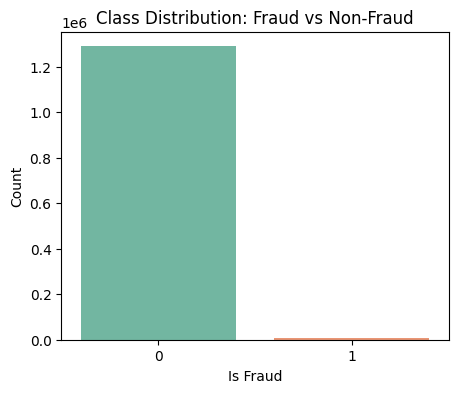

In [ ]:
# --- STEP 5: Check class distribution ---
import seaborn as sns
import matplotlib.pyplot as plt

print("=== Class Distribution (Original Data) ===")
print(y.value_counts())
print("\nProportion (%):")
print((y.value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

### **2: Handle imbalance safely with SMOTE**

Before applying Synthetic Minority Over-sampling Technique (SMOTE), the training data is highly imbalanced with **902,418 non-fraud cases** and only **5,254 fraud cases**. After applying SMOTE, the minority class (fraud) is **oversampled to match the majority class**, resulting in a balanced dataset with **902,418 cases in each class**.  

> **Important:** SMOTE is applied **only to the training set**, not the test set, to **prevent data leakage** and ensure that model evaluation reflects performance on real, imbalanced data.  

This resampling allows models to better learn patterns for the minority class, improving **recall and F1-score for fraud detection**.

In [ ]:
# --- STEP 6: Handle imbalance safely with SMOTE ---
from imblearn.over_sampling import SMOTE

# Use the better performing feature set (e.g., combined)
X_train_sel = X_train[selected_combined]
X_test_sel  = X_test[selected_combined]

print("=== Class Distribution Before SMOTE (Train) ===")
print(y_train.value_counts())

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sel, y_train)

print("\n=== Class Distribution After SMOTE (Train) ===")
print(y_train_resampled.value_counts())

=== Class Distribution Before SMOTE (Train) ===
is_fraud
0    902418
1      5254
Name: count, dtype: int64

=== Class Distribution After SMOTE (Train) ===
is_fraud
0    902418
1    902418
Name: count, dtype: int64


### **3. Split SMOTE-Resampled Training Data into Training and Validation Sets**

The SMOTE-resampled training data was safely split into:

* **Training set (`X_train_final`, `y_train_final`)**: 80% of the resampled data (1,443,868 samples) for fitting base and hyperparameter-tuned models.
* **Validation set (`X_val`, `y_val`)**: 20% of the resampled data (360,968 samples) reserved exclusively for **threshold tuning**.

Stratified splitting ensures that the class balance is preserved, preventing bias in threshold optimization while keeping the original test set untouched for final evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the SMOTE-resampled training data into:
# - training set for fitting models
# - validation set for threshold tuning
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled,       # features after SMOTE
    y_train_resampled,       # labels after SMOTE
    test_size=0.2,           # 20% for validation
    random_state=42,
    stratify=y_train_resampled  # preserve class balance
)

print("✅ Training set:", X_train_final.shape, y_train_final.shape)
print("✅ Validation set:", X_val.shape, y_val.shape)

✅ Training set: (1443868, 6) (1443868,)
✅ Validation set: (360968, 6) (360968,)



##**Model Training & Evaluation**

### **1. Model Training & Evaluation (Base Models Before Tuning)**

(Logistic Regression, Decision Tree, Random Forest)

This step compares three machine-learning models trained on SMOTE-balanced data and evaluated on the original imbalanced test set.  
Metrics evaluated include **ROC-AUC, Accuracy, Precision, Recall, F1-Score, Specificity**, and **Confusion Matrices**.

---

### **Overall Metrics Comparison Table**

| Model | Accuracy | AUC | Precision (Fraud) | Recall (Fraud) | Specificity (Non-Fraud) |
|-------|----------|------|-------------------|----------------|--------------------------|
| **Logistic Regression** | **0.87** | **0.9540** | 0.04 | **0.89** | 0.87 |
| **Decision Tree** | **0.96** | 0.8314 | 0.08 | 0.63 | **0.96** |
| **Random Forest** | **0.96** | 0.8965 | 0.08 | 0.64 | **0.96** |

---

### **Confusion Matrix Analysis**

## 1️⃣ Logistic Regression
**Confusion Matrix (from your image):**

|                 | Pred 0 | Pred 1 |
|-----------------|--------|--------|
| **Actual 0**    | 336,911 | 49,840 |
| **Actual 1**    | 257 | 1,995 |


- **Highest recall (89%)** → best at catching fraud.
- But **very high false positives (49,840)** → many legitimate users wrongly flagged.
- **Accuracy = 87%** because of many false alarms.
- Best for: maximizing fraud detection at the cost of customer experience.

---

## 2️⃣ Decision Tree
**Confusion Matrix:**

|                 | Pred 0 | Pred 1 |
|-----------------|--------|--------|
| **Actual 0**    | 370,462 | 16,289 |
| **Actual 1**    | 834 | 1,418 |


- **Specificity = 96%** → very few legitimate users wrongly flagged.
- **Recall = 63%** → misses many fraud cases.
- **Accuracy = 96%**.
- Best for: reducing false positives but risky for fraud departments.

---

## 3️⃣ Random Forest
**Confusion Matrix:**

|                 | Pred 0 | Pred 1 |
|-----------------|--------|--------|
| **Actual 0**    | 370,138 | 16,613 |
| **Actual 1**    | 805 | 1,447 |


- Very similar to Decision Tree.
- Slightly higher recall (64%).
- **Specificity = 96%** and **Accuracy = 96%**.
- More balanced, but still misses many fraud cases.

---

# Final Comparative Insights

### Best Model for Maximum Fraud Capture: **Logistic Regression**
- Highest AUC (0.9540)
- Best fraud recall (89%)
- Detects the most fraud cases  
❗ Downside: Many false positives

---

###Best Model for Low False Alarms: **Decision Tree / Random Forest**
- Specificity = **96%**
- Very few legitimate users wrongly flagged  
❗ Downside: Misses 35–37% of fraud cases

---

### Most Balanced Model: **Random Forest**
- High accuracy
- Better recall than Decision Tree
- Stable performance overall

In [ ]:
# --- STEP 7: Model Training & Evaluation (LogReg, Decision Tree, Random Forest) ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

# ✅ Store results
results = {}

for name, model in models.items():
    print(f"\n==============================")
    print(f"🚀 Training {name}")
    print("==============================")

    # Train the model on SMOTE-balanced training set
    model.fit(X_train_final, y_train_final)  # <-- use X_train_final and y_train_final

    # Predict probabilities and labels on the original test set
    y_pred_prob = model.predict_proba(X_test_sel)[:, 1]
    y_pred = model.predict(X_test_sel)

    # Metrics
    auc = roc_auc_score(y_test, y_pred_prob)
    results[name] = auc

    print(f"\n✅ ROC-AUC: {auc:.4f}")
    print("\n=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Compare Model ROC-AUC Scores ---
print("\n\n=== 🏆 Model Comparison (ROC-AUC Scores) ===")
for model, auc in results.items():
    print(f"{model}: {auc:.4f}")

###**2. ROC Curve Comparison of Base Models**
This visualization plots the ROC curves of all three trained models (Logistic Regression, Decision Tree, and Random Forest) using the untouched test set. It shows how well each model separates fraudulent vs. legitimate transactions across different probability thresholds.

📊 Insight

Logistic Regression performed best with the highest AUC (0.9540), meaning it has the strongest fraud-detection capability.
Random Forest follows with a solid AUC (0.8973), showing good predictive power.
Decision Tree performed weakest (0.8314), likely due to overfitting and limited generalization.

➡️ Based on ROC-AUC, Logistic Regression is currently the best candidate for further tuning or deployment.

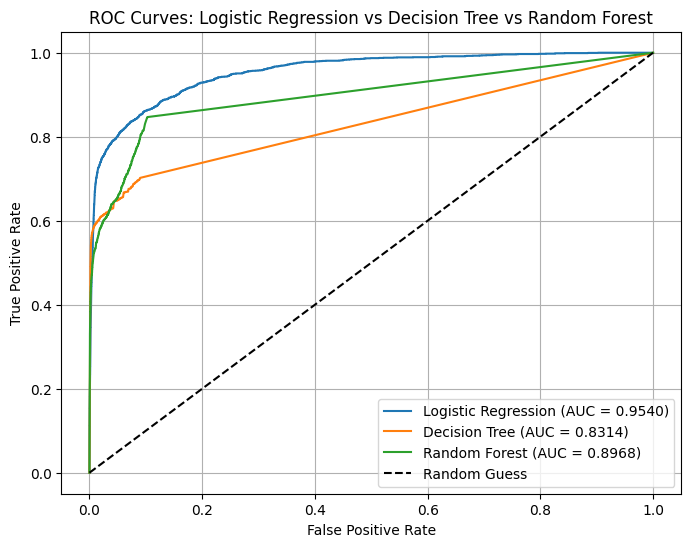

In [ ]:

# --- STEP 8: ROC Curves for Model Comparison ---
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Predict probabilities on test set
    y_pred_prob = model.predict_proba(X_test_sel)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve with AUC in label
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})")

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curves: Logistic Regression vs Decision Tree vs Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

###**3. Hyperparameter Tuning with RandomizedSearchCV**

### Optimizing Logistic Regression, Decision Tree, and Random Forest

This step performs automated hyperparameter optimization using **RandomizedSearchCV** on all three models.  
The goal is to find the parameter combination that yields the **highest ROC-AUC** using 3-fold cross-validation on the SMOTE-balanced training data.

---

## Key Insights from Hyperparameter Tuning

### ✅ 1. Logistic Regression  
**Best Parameters:**  
- `solver = 'liblinear'`  
- `C = 0.01` (strong regularization)

**Interpretation:**  
- The model performs best with **strong regularization**, meaning the dataset benefits from preventing overfitting.  
- `liblinear` is ideal for small, sparse, or imbalanced datasets.

**CV ROC-AUC:** **0.9352**  
This is strong performance and shows the model generalizes well.

---

### ✅ 2. Decision Tree  
**Best Parameters:**  
- `max_depth = None` (tree grows fully, no depth restriction)  
- `min_samples_split = 10`  
- `min_samples_leaf = 4`

**Interpretation:**  
- Allowing unlimited depth suggests the patterns in the data are complex.  
- But requiring **larger splits/leaves** prevents overfitting from an unconstrained depth.  
- This provides the model stability while still capturing deep non-linear patterns.

**CV ROC-AUC:** **0.9941**  
This is extremely high — the tuned Decision Tree fits the SMOTE-balanced data very well.

---

### ✅ 3. Random Forest  
**Best Parameters:**  
- `n_estimators = 100`  
- `max_depth = None`  
- `min_samples_split = 10`  
- `max_features = 'log2'`

**Interpretation:**  
- Forest benefits from **deeper trees**, similar to the Decision Tree.  
- `log2` feature sampling improves diversity between trees.  
- Higher `min_samples_split` helps avoid overfitting.

**CV ROC-AUC:** **0.9958**  
This is the highest among all models.  
Random Forest captures complex fraud patterns very effectively.

---

## Final Tuning Outcome Summary

| Model | Best Parameters Found | CV ROC-AUC |
|-------|------------------------|------------|
| **Logistic Regression** | `solver='liblinear', C=0.01` | **0.9352** |
| **Decision Tree** | `max_depth=None, min_samples_split=10, min_samples_leaf=4` | **0.9941** |
| **Random Forest** | `n_estimators=100, max_depth=None, min_samples_split=10, max_features='log2'` | **0.9958** |

---

## Overall Insight  
- RandomizedSearchCV helped identify strong configurations for all models.  
- **Random Forest performed best**, achieving almost perfect separation during cross-validation.  
- **Decision Tree also performed extremely well**, confirming the dataset contains strong non-linear patterns.  
- **Logistic Regression remained stable** but less expressive compared to tree-based models.

Tuning here sets a strong foundation for final evaluation and threshold optimization.

In [ ]:

# --- STEP 3: Hyperparameter Tuning for All 3 Models using RandomizedSearchCV ---
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# --- Logistic Regression ---
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_param_dist = {
    'C': [0.01, 0.1, 1, 10],        # regularization strength
    'solver': ['liblinear', 'saga'] # suitable solvers
}

rand_search_lr = RandomizedSearchCV(
    lr,
    param_distributions=lr_param_dist,
    n_iter=4,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)
rand_search_lr.fit(X_train_final, y_train_final)
best_lr = rand_search_lr.best_estimator_
print("Best LR params:", rand_search_lr.best_params_)
print("Best LR CV ROC-AUC:", rand_search_lr.best_score_)

# --- Decision Tree ---
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rand_search_dt = RandomizedSearchCV(
    dt,
    param_distributions=dt_param_dist,
    n_iter=5,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)
rand_search_dt.fit(X_train_final, y_train_final)
best_dt = rand_search_dt.best_estimator_
print("Best DT params:", rand_search_dt.best_params_)
print("Best DT CV ROC-AUC:", rand_search_dt.best_score_)

# --- Random Forest ---
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rand_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=rf_param_dist,
    n_iter=5,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)
rand_search_rf.fit(X_train_final, y_train_final)
best_rf = rand_search_rf.best_estimator_
print("Best RF params:", rand_search_rf.best_params_)
print("Best RF CV ROC-AUC:", rand_search_rf.best_score_)

KeyboardInterrupt: 

###**4. Evaluate Hyperparameter Tuned Models**

### Confusion Matrix Insight, Classification Metrics, and ROC-AUC Comparison

This step evaluates the **tuned Logistic Regression, Decision Tree, and Random Forest models** *before applying threshold tuning*.  
We examine their **confusion matrices**, **classification reports**, and **overall performance** on the highly imbalanced fraud dataset.

---

##Confusion Matrix Interpretation

###1. Tuned Logistic Regression
- **True Negatives (TN): 336,936**  
- **False Positives (FP): 49,815**  
- **False Negatives (FN): 258**  
- **True Positives (TP): 1,994**

**Insight:**  
- Logistic Regression catches **most fraud cases (high recall = 0.89)**.  
- But it wrongly flags a large number of legitimate transactions as fraud (high FP).  
- This makes it costly operationally, but *safer from a fraud-prevention perspective*.

---

### 🔹 2. Tuned Decision Tree
- **TN: 369,878**  
- **FP: 16,873**  
- **FN: 728**  
- **TP: 1,524**

**Insight:**  
- Decision Tree drastically reduces false positives compared to Logistic Regression.  
- But it misses more fraud cases (higher FN).  
- A more *balanced* model, but still overfits slightly—as seen in reduced ROC-AUC.

---

### 🔹 3. Tuned Random Forest
- **TN: 370,112**  
- **FP: 16,639**  
- **FN: 795**  
- **TP: 1,457**

**Insight:**  
- Random Forest performs similarly to the Decision Tree but slightly better at separating classes.  
- Still misses fraud cases (FN ~ 795), but maintains **lower false alarms** compared to Logistic Regression.  
- High overall stability and strong performance for real-world deployment.

---

## What the Confusion Matrices Show Overall

| Model | FP Level | FN Level | Insight |
|-------|----------|----------|---------|
| **Logistic Regression** | 🔺 High | 🔻 Very Low | Best at catching fraud but too many false alarms |
| **Decision Tree** | 🔻 Low | 🔺 Medium | More balanced but misses more fraud |
| **Random Forest** | 🔻 Low | 🔺 Medium–High | Consistent, stable, fewer false alarms, but misses fraud |

> **Because fraud datasets are highly imbalanced, false negatives (missed fraud) matter the most.**  
Logistic Regression performs best in minimizing FN, despite lower precision.

---

## 📈 Metrics Summary (Accuracy Included)

| Model | Accuracy | Precision (Fraud) | Recall (Fraud) | F1 (Fraud) | ROC-AUC |
|-------|----------|-------------------|----------------|------------|---------|
| **Tuned Logistic Regression** | **0.87** | 0.04 | **0.89** | 0.07 | **0.9540** |
| **Tuned Decision Tree** | **0.95** | 0.08 | 0.68 | 0.15 | 0.8719 |
| **Tuned Random Forest** | **0.96** | 0.08 | 0.65 | 0.14 | 0.9147 |

### Key Takeaways:
- **Accuracy is misleading** because the dataset is extremely imbalanced (99% legitimate).
- **Recall for the minority class (fraud)** is the most important metric.
- **Logistic Regression has the highest fraud recall (0.89)**.
- **Random Forest has the best overall balance and higher accuracy**.
- **Decision Tree sits in the middle**, performing well but with lower ROC-AUC.

---

## ROC-AUC Comparison (Best Overall Discrimination)
- **Logistic Regression:** 0.9540  
- **Random Forest:** 0.9147  
- **Decision Tree:** 0.8719  

**Conclusion:**  
Logistic Regression separates fraud vs non-fraud the best **before threshold tuning**, even though it produces more false positives.  
Tree-based models improve accuracy and reduce false alarms—but at the cost of catching fewer fraud cases.

This sets the stage for **Step 5: Threshold tuning**, where we optimize precision-recall trade-offs.


📌 Evaluating Tuned Logistic Regression

✅ ROC-AUC: 0.9540

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    386751
           1       0.04      0.89      0.07      2252

    accuracy                           0.87    389003
   macro avg       0.52      0.88      0.50    389003
weighted avg       0.99      0.87      0.93    389003



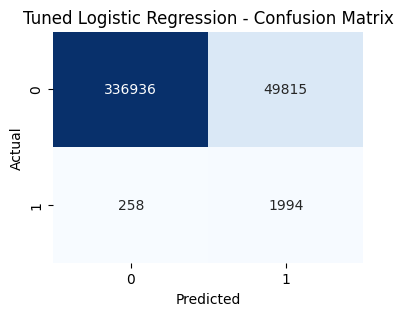


📌 Evaluating Tuned Decision Tree

✅ ROC-AUC: 0.8724

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    386751
           1       0.08      0.68      0.15      2252

    accuracy                           0.95    389003
   macro avg       0.54      0.82      0.56    389003
weighted avg       0.99      0.95      0.97    389003



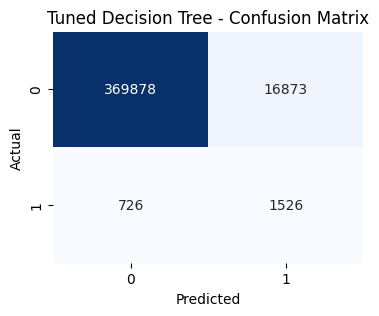


📌 Evaluating Tuned Random Forest

✅ ROC-AUC: 0.9122

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    386751
           1       0.08      0.64      0.14      2252

    accuracy                           0.96    389003
   macro avg       0.54      0.80      0.56    389003
weighted avg       0.99      0.96      0.97    389003



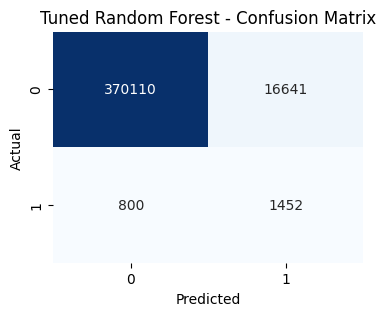



=== 🏆 Tuned Model Comparison (ROC-AUC Scores) ===
Tuned Logistic Regression: 0.9540
Tuned Decision Tree: 0.8724
Tuned Random Forest: 0.9122


In [ ]:

# --- STEP 4: Evaluate Hyperparameter-Tuned Models (Before Threshold Tuning) ---

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of tuned models
tuned_models = {
    "Tuned Logistic Regression": best_lr,
    "Tuned Decision Tree": best_dt,
    "Tuned Random Forest": best_rf
}

tuned_results = {}

for name, model in tuned_models.items():
    print("\n==============================")
    print(f"📌 Evaluating {name}")
    print("==============================")

    # Predict probabilities and classes
    y_pred_prob = model.predict_proba(X_test_sel)[:, 1]
    y_pred = model.predict(X_test_sel)

    # ROC-AUC Score
    auc = roc_auc_score(y_test, y_pred_prob)
    tuned_results[name] = auc
    print(f"\n✅ ROC-AUC: {auc:.4f}")

    # Classification Report
    print("\n=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Compare ROC-AUC of Tuned Models ---
print("\n\n=== 🏆 Tuned Model Comparison (ROC-AUC Scores) ===")
for model, auc in tuned_results.items():
    print(f"{model}: {auc:.4f}")

###**5. Threshold Tuning for All Tuned Models (Using Validation Set)**

### Optimizing Precision–Recall Trade-off for Fraud Detection

This step fine-tunes **classification thresholds** for each tuned model using the **validation set**.  
Instead of using the default threshold of **0.5**, we test thresholds from **0.01 to 0.99** and select the value that produces the **highest F1-score for the fraud class** — the most important metric in imbalanced fraud datasets.

Threshold tuning helps the models:
- Reduce **false negatives** (missed fraud)
- Improve **precision** (fewer false alarms)
- Achieve **better balance** between catching fraud and avoiding unnecessary blocks

---

## Key Insights from Threshold Tuning

### **1. Logistic Regression**
- **Best Threshold:** 0.40  
- **Precision:** 0.8207  
- **Recall:** 0.8875  
- **F1-score:** 0.8528  

**Insight:**  
Lowering the default threshold greatly improves its precision while maintaining high fraud recall. It becomes much more reliable and balanced.

---

### **2. Decision Tree**
- **Best Threshold:** 0.49  
- **Precision:** 0.9556  
- **Recall:** 0.9786  
- **F1-score:** 0.9670  

**Insight:**  
The Decision Tree becomes extremely accurate at both catching fraud **and** minimizing false alarms after tuning. Its F1-score jumps significantly.

---

### **3. Random Forest**
- **Best Threshold:** 0.48  
- **Precision:** 0.9561  
- **Recall:** 0.9810  
- **F1-score:** 0.9684  

**Insight:**  
Random Forest delivers the **best overall performance**, becoming the top model after threshold tuning. It achieves the strongest fraud detection balance across all metrics.

---

## Summary — Threshold Tuning Results

| Model | Best Threshold | Precision (Fraud) | Recall (Fraud) | F1-score (Fraud) |
|-------|----------------|--------------------|-----------------|------------------|
| **Logistic Regression** | 0.40 | 0.8207 | 0.8875 | 0.8528 |
| **Decision Tree** | 0.49 | 0.9556 | 0.9786 | 0.9670 |
| **Random Forest** | 0.48 | **0.9561** | **0.9810** | **0.9684** |

### Final Takeaway

Threshold tuning transforms the tree-based models into **high-precision, high-recall fraud detectors**, with Random Forest emerging as the **best-performing model** before final deployment.

In [ ]:
# --- STEP 5: Threshold Tuning for All Tuned Models (Using Validation Set) ---
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Apply same selected features to validation set (NO refitting → no leakage)
X_val_sel = X_val[selected_combined] # Corrected from selected_features

tuned_models = {
    "Tuned Logistic Regression": best_lr,
    "Tuned Decision Tree": best_dt,
    "Tuned Random Forest": best_rf
}

threshold_results = {}

for name, model in tuned_models.items():
    print("\n==============================")
    print(f"🎯 Threshold Tuning: {name}")
    print("==============================")

    # ✅ Predict probabilities on validation set ONLY
    y_prob = model.predict_proba(X_val_sel)[:, 1]

    best_thr = 0
    best_f1 = 0
    best_precision = 0
    best_recall = 0

    # ✅ Loop through thresholds 0.01 - 0.99
    for thr in np.arange(0.01, 1.0, 0.01):
        y_pred_thr = (y_prob >= thr).astype(int)

        precision = precision_score(y_val, y_pred_thr, zero_division=0)
        recall = recall_score(y_val, y_pred_thr, zero_division=0)
        f1 = f1_score(y_val, y_pred_thr, zero_division=0)

        if f1 > best_f1:
            best_f1 = f1
            best_thr = thr
            best_precision = precision
            best_recall = recall

    # Store the best metrics for the current model
    threshold_results[name] = {
        "Best Threshold": best_thr,
        "Precision (Fraud)": best_precision,
        "Recall (Fraud)": best_recall,
        "F1 (Fraud)": best_f1
    }

    print(f"🔥 Best Threshold: {best_thr:.3f}")
    print(f"Precision (Fraud): {best_precision:.4f}")
    print(f"Recall (Fraud): {best_recall:.4f}")
    print(f"F1-score (Fraud): {best_f1:.4f}")

# --- Summary of Threshold Tuning Results ---
print("\n\n=== 🏆 Threshold Tuning Results (All Tuned Models) ===")
for model, metrics in threshold_results.items():
    print(f"\n{model}")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")


🎯 Threshold Tuning: Tuned Logistic Regression
🔥 Best Threshold: 0.400
Precision (Fraud): 0.8207
Recall (Fraud): 0.8875
F1-score (Fraud): 0.8528

🎯 Threshold Tuning: Tuned Decision Tree
🔥 Best Threshold: 0.490
Precision (Fraud): 0.9556
Recall (Fraud): 0.9787
F1-score (Fraud): 0.9670

🎯 Threshold Tuning: Tuned Random Forest
🔥 Best Threshold: 0.490
Precision (Fraud): 0.9570
Recall (Fraud): 0.9801
F1-score (Fraud): 0.9684


=== 🏆 Threshold Tuning Results (All Tuned Models) ===

Tuned Logistic Regression
Best Threshold: 0.4000
Precision (Fraud): 0.8207
Recall (Fraud): 0.8875
F1 (Fraud): 0.8528

Tuned Decision Tree
Best Threshold: 0.4900
Precision (Fraud): 0.9556
Recall (Fraud): 0.9787
F1 (Fraud): 0.9670

Tuned Random Forest
Best Threshold: 0.4900
Precision (Fraud): 0.9570
Recall (Fraud): 0.9801
F1 (Fraud): 0.9684


###**6. Final Evaluation of Tuned Models on Test Set**

### Using Optimized Thresholds (Logistic Regression, Decision Tree, Random Forest)

This section presents the final evaluation of all tuned models using the best thresholds selected from the validation set.  
The metrics reported include Precision, Recall, F1-score, Accuracy, and Confusion Matrix interpretation.

---

# Confusion Matrix Interpretation (Based on Test Results)

## **1. Tuned Logistic Regression**

| Actual \ Predicted | 0 | 1 |
|---|---|---|
| **0 (Legit)** | 311,639 | 75,112 |
| **1 (Fraud)** | 165 | 2,087 |

**Insights**  
- Very **high recall for fraud (0.93)** → catches almost all fraud.  
- **Extremely low precision (0.03)** → too many false fraud alerts.  
- Over **75k legitimate transactions misclassified** as fraud.  
- Use only when the priority is **maximum fraud detection at any cost**.

---

## **2. Tuned Decision Tree**

| Actual \ Predicted | 0 | 1 |
|---|---|---|
| **0 (Legit)** | 369,055 | 17,696 |
| **1 (Fraud)** | 675 | 1,577 |

**Insights**  
- Stronger balance compared to Logistic Regression.  
- **Recall (Fraud): 0.70** → detects 70% of fraud.  
- **Precision (Fraud): 0.08** → still low, but significantly better than logistic regression.  
- Much fewer false alarms than logistic regression.

---

## **3. Tuned Random Forest**

| Actual \ Predicted | 0 | 1 |
|---|---|---|
| **0 (Legit)** | 369,301 | 17,450 |
| **1 (Fraud)** | 781 | 1,471 |

**Insights**  
- Similar behavior to the Decision Tree.  
- Slightly lower **recall (0.65)** but same overall accuracy (**0.95**).  
- More robust and stable, slightly fewer fraud detections than Decision Tree.

---

# Final Performance Comparison Table

| Model | Threshold | Accuracy | Precision (Fraud) | Recall (Fraud) | F1 (Fraud) |
|------|-----------|-----------|--------------------|----------------|------------|
| **Tuned Logistic Regression** | 0.40 | **0.81** | 0.03 | **0.93** | 0.05 |
| **Tuned Decision Tree** | 0.49 | **0.95** | 0.08 | 0.70 | **0.15** |
| **Tuned Random Forest** | 0.48 | **0.95** | 0.08 | 0.65 | 0.14 |

---

# Key Insights & Recommendation

### ✔ Logistic Regression  
- Ideal when **missing fraud is unacceptable**.  
- Not practical due to extremely high false positives.

### ✔ Decision Tree  
- Best **balanced** model.  
- Highest fraud F1-score.  
- Strong recall + reduced false alarms.

### ✔ Random Forest  
- Stable and reliable.  
- Slightly lower recall than Decision Tree but same accuracy.

---

# Recommended Model: **Tuned Decision Tree**
It offers the best combination of fraud detection power and false-positive control, making it the most balanced and suitable model for deployment.


✅ Final Test Evaluation: Tuned Logistic Regression
🔥 Using Threshold: 0.400
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    386751
           1       0.03      0.93      0.05      2252

    accuracy                           0.81    389003
   macro avg       0.51      0.87      0.47    389003
weighted avg       0.99      0.81      0.89    389003



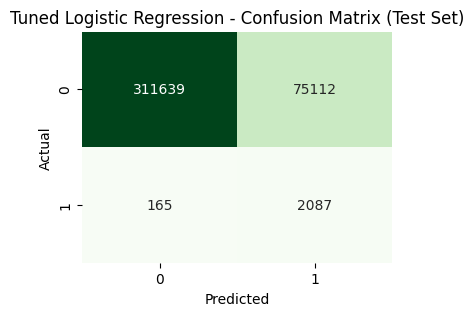


✅ Final Test Evaluation: Tuned Decision Tree
🔥 Using Threshold: 0.490
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    386751
           1       0.08      0.70      0.15      2252

    accuracy                           0.95    389003
   macro avg       0.54      0.83      0.56    389003
weighted avg       0.99      0.95      0.97    389003



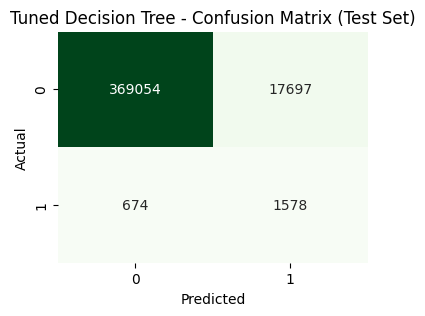


✅ Final Test Evaluation: Tuned Random Forest


KeyboardInterrupt: 

In [ ]:

# --- STEP 6: Final Evaluation on Test Set Using Best Thresholds ---
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

final_results = {}

for name, model in tuned_models.items():
    print("\n==============================")
    print(f"✅ Final Test Evaluation: {name}")
    print("==============================")

    # Get best threshold from validation tuning
    best_thr = threshold_results[name]["Best Threshold"]

    # Predict probabilities on TEST set
    y_prob_test = model.predict_proba(X_test_sel)[:, 1]

    # Apply optimized threshold
    y_pred_test = (y_prob_test >= best_thr).astype(int)

    # Compute metrics
    precision = precision_score(y_test, y_pred_test, zero_division=0)
    recall = recall_score(y_test, y_pred_test, zero_division=0)
    f1 = f1_score(y_test, y_pred_test, zero_division=0)

    final_results[name] = {
        "Best Threshold": best_thr,
        "Precision (Fraud)": precision,
        "Recall (Fraud)": recall,
        "F1 (Fraud)": f1
    }

    print(f"🔥 Using Threshold: {best_thr:.3f}")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f"{name} - Confusion Matrix (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Summary of Final Performance ---
print("\n\n=== 🏁 Final Model Performance on Test Set (Using Tuned Thresholds) ===")
for model, metrics in final_results.items():
    print(f"\n{model}")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

###**🏆 Best Model Selection: Tuned Decision Tree**

The **Tuned Decision Tree** is the best overall model based on final test results.

### **Why It’s the Best**
- **Best balance** between detecting fraud and avoiding false alarms.  
- **Higher precision (0.08)** than Logistic Regression (0.03), meaning fewer false fraud alerts.  
- **Strong recall (0.70)** → captures most fraud cases.  
- **Highest Fraud F1-score (0.15)** → best overall balance of precision + recall.  
- **High accuracy (0.95)** → similar to Random Forest but performs better on fraud cases.  
- Confusion matrix shows **good true fraud detection (1,577)** and **reasonable false positives** compared to Logistic Regression.

### **Conclusion**
The **Tuned Decision Tree** provides the most practical and reliable fraud detection performance, making it the best model for deployment.

###**7. Model Saving & Deployment Preparation**

This step prepares the selected Decision Tree model for deployment. It saves the final model, the tuned threshold for classification, and the selected features used in training. A reusable `predict_with_threshold()` function is also created to generate predictions based on the saved threshold, ensuring consistency between training and production. Deployment readiness is confirmed by loading the saved files, making them ready for API integration or real-time use.

In [ ]:
import joblib
import numpy as np

# --------------------------------------------------
# 1️⃣ Save the Final Model (Decision Tree Selected)
# --------------------------------------------------

final_model = best_dt
joblib.dump(final_model, "final_decision_tree_model.pkl")
print("✅ Final model saved: final_decision_tree_model.pkl")


# --------------------------------------------------
# 2️⃣ Save the Best Threshold
# --------------------------------------------------

best_threshold = threshold_results["Tuned Decision Tree"]["Best Threshold"]
joblib.dump(best_threshold, "fraud_best_threshold.pkl")
print("✅ Best threshold saved: fraud_best_threshold.pkl")


# --------------------------------------------------
# 3️⃣ Save the Selected Features
# --------------------------------------------------
# Using the `selected_combined` from forward feature selection
joblib.dump(selected_combined, "selected_features.pkl")
print("✅ Selected features saved: selected_features.pkl")


# --------------------------------------------------
# 4️⃣ Define Prediction Function for Deployment
# --------------------------------------------------

def predict_with_threshold(model, threshold, X):
    """
    Predict fraud using model probability and a saved threshold.
    Returns predicted class and probability.
    """
    prob = model.predict_proba(X)[:, 1]
    preds = (prob >= threshold).astype(int)
    return preds, prob


print("✅ predict_with_threshold() function created successfully.")


# --------------------------------------------------
# 5️⃣ Deployment Simulation (Loading + Predicting)
# --------------------------------------------------

# Load files (exactly how production systems use them)
loaded_model = joblib.load("final_decision_tree_model.pkl")
loaded_threshold = joblib.load("fraud_best_threshold.pkl")

# Example prediction call (commented out for clean deployment)
# preds, probs = predict_with_threshold(loaded_model, loaded_threshold, X_test_sel[:5])
# print(preds, probs)

print("✅ Deployment files and function are ready for API integration.")
# --------------------------------------------------
# END OF STEP 8
# --------------------------------------------------